In [1]:
import pandas as pd

In [3]:
sal=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")
sal

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [4]:
type(sal)

pandas.core.frame.DataFrame

In [5]:
sal.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [7]:
sal.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

# EDA

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(sal['rank'])
dis_label = le.fit_transform(sal['discipline']) 
sex_label = le.fit_transform(sal['sex'])

# printing label
label
dis_label
sex_label

sal["rank"] = label
sal["discipline"] = dis_label
sal["sex"] = sex_label
sal


,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [16]:
sal.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


In [18]:
sal.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


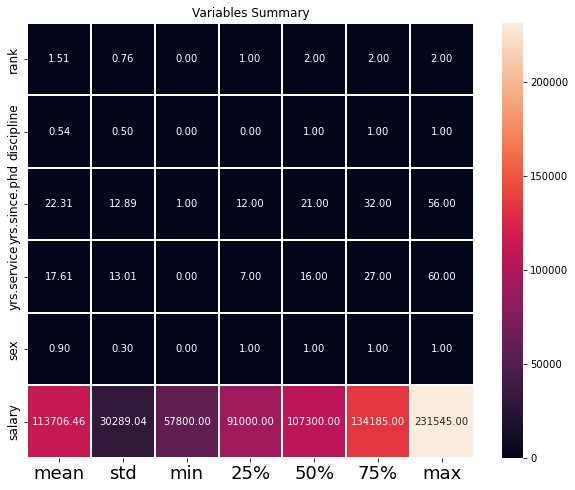

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(round(sal.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt=".2f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables Summary")
plt.show()

In [23]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   rank           397 non-null    int64
 1   discipline     397 non-null    int64
 2   yrs.since.phd  397 non-null    int64
 3   yrs.service    397 non-null    int64
 4   sex            397 non-null    int64
 5   salary         397 non-null    int64
dtypes: int64(6)
memory usage: 18.7 KB


Outliers:

In [24]:
import warnings
warnings.filterwarnings('ignore')

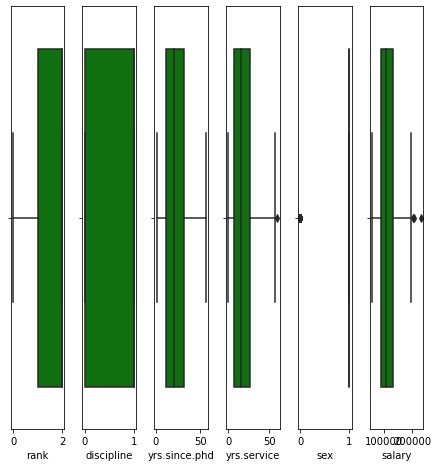

In [26]:
collist=sal.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(sal[collist[i]],color='green',orient='h')
    plt.tight_layout()#fits all graphs in one single format

# Skewness

In [28]:
sal.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

In [ ]:
Skewness threshold taken +/- 0.75

<AxesSubplot:xlabel='rank', ylabel='Density'>

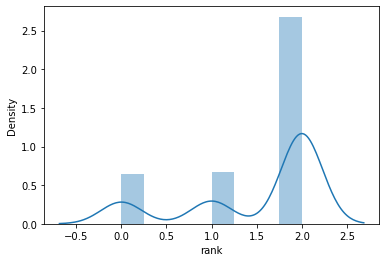

In [29]:
sns.distplot(sal["rank"])

<AxesSubplot:xlabel='discipline', ylabel='Density'>

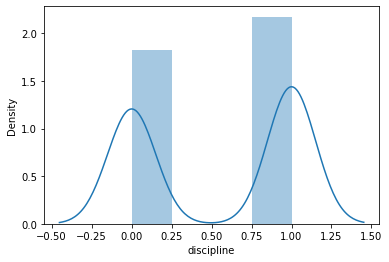

In [31]:
sns.distplot(sal["discipline"])

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

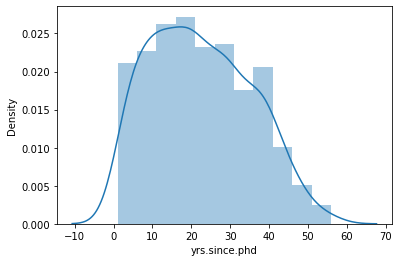

In [32]:
sns.distplot(sal["yrs.since.phd"])

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

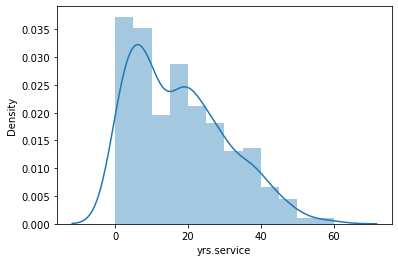

In [33]:
sns.distplot(sal["yrs.service"])

<AxesSubplot:xlabel='sex', ylabel='Density'>

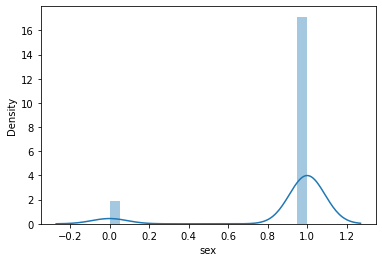

In [34]:
sns.distplot(sal["sex"])

<AxesSubplot:xlabel='salary', ylabel='Density'>

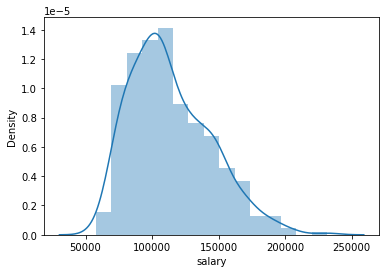

In [35]:
sns.distplot(sal["salary"])

The normal distribution shows the data is skewed

# Data Cleaning:

Z-score Technique:

In [39]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(sal))
z.shape

(397, 6)

In [41]:
threshold=3
#index number
print(np.where(z>3))#returns index location of ouliers

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
       103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
       230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
       341, 358, 361, 364], dtype=int64), array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
      dtype=int64))


In [42]:
len(np.where(z>3)[0])

43

In [46]:
z.iloc[9]

rank             0.649257
discipline       0.915403
yrs.since.phd    0.335245
yrs.service      0.029669
sex              3.029767
salary           0.505557
Name: 9, dtype: float64

In [47]:
#to drop Outliers;
sal_new=sal[(z<3).all(axis=1)]
print("old dataFrame",sal.shape)
print("new dataFrame",sal_new.shape)
print("total dropped rows",sal.shape[0]-sal_new.shape[0])

old dataFrame (397, 6)
new dataFrame (354, 6)
total dropped rows 43


percentage data loss

In [48]:
loss_percent=(397-354)/397*100
print(loss_percent,'%')

10.831234256926953 %


In [49]:
#independent col
x=sal_new.iloc[:,:-1]
#target
y=sal_new.iloc[:,-1]

# Transforming data to remove skewness

In [51]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.67101798,  0.9133438 , -0.21258493,  0.17167846,  0.        ],
       [ 0.67101798,  0.9133438 , -0.13497443,  0.02069192,  0.        ],
       [-1.42665643,  0.9133438 , -1.58301473, -1.29620994,  0.        ],
       ...,
       [ 0.67101798, -1.09487797,  1.432026  ,  0.65348233,  0.        ],
       [ 0.67101798, -1.09487797,  0.2434438 , -0.05751354,  0.        ],
       [-1.42665643, -1.09487797, -1.15483268, -1.15036131,  0.        ]])

In [52]:
pd.DataFrame(x).skew()

0   -0.825414
1   -0.182308
2   -0.013022
3   -0.007703
4    0.000000
dtype: float64

In [53]:
from sklearn.preprocessing import StandardScaler # transforms data such that mean =0 and std dev=1
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.67101798,  0.9133438 , -0.21258493,  0.17167846,  0.        ],
       [ 0.67101798,  0.9133438 , -0.13497443,  0.02069192,  0.        ],
       [-1.42665643,  0.9133438 , -1.58301473, -1.29620994,  0.        ],
       ...,
       [ 0.67101798, -1.09487797,  1.432026  ,  0.65348233,  0.        ],
       [ 0.67101798, -1.09487797,  0.2434438 , -0.05751354,  0.        ],
       [-1.42665643, -1.09487797, -1.15483268, -1.15036131,  0.        ]])

In [54]:
x.mean()

-8.028731477515257e-18

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [56]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.2)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
       print("At random state",i," The model performs very well")
       print("At random state:-",i)
       print("Training Accuracy Score is:-",accuracy_score(y_train,pred_train)*100)
       print("Testing Accuracy Score is:-",accuracy_score(y_test,pred_test)*100)

In [ ]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=827)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))